__Customer Churn Analysis__


Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [348]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [349]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Telecom_customer_churn.csv",engine='python')

In [350]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [351]:
df.shape

(7043, 21)

In [352]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [354]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [355]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


over all we have-->>>>>>>>

Size of set: 7043 records

target variable is 'churn'

there are no null values as well

most of the data is categorical

__Feature processing__ :

__gender__

In [356]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [357]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

<AxesSubplot:xlabel='gender', ylabel='count'>

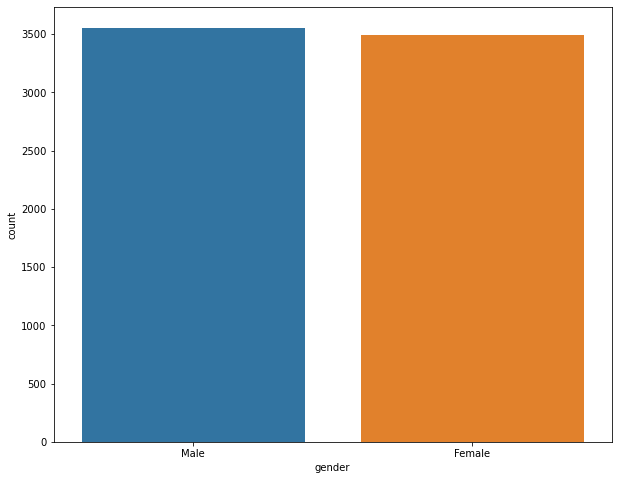

In [358]:
plt.figure(figsize=(10,8))
sns.countplot(df.gender,order=df.gender.value_counts().index)

In [359]:
countmale = len(df[df.gender == 'Male'])
countfemale = len(df[df.gender == 'Female'])
print("Percentage of male: {:.2f}%".format((countmale / (len(df.gender))*100)))
print("Percentage of female: {:.2f}%".format((countfemale / (len(df.gender))*100)))

Percentage of male: 50.48%
Percentage of female: 49.52%


ratio of male and female in gender is almost same and equal

__Senior-Citizen__


In [360]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

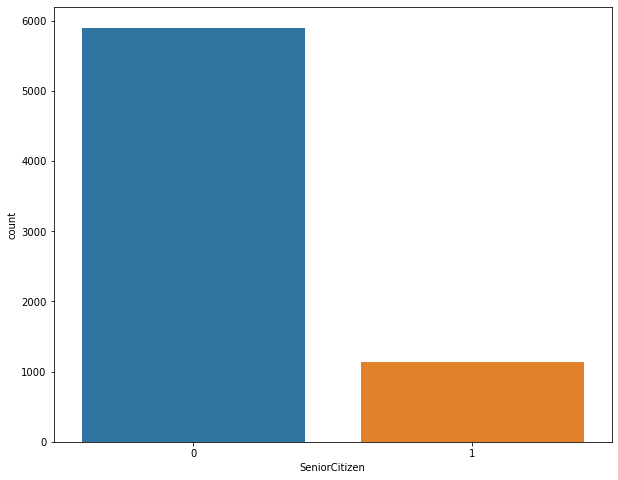

In [361]:
plt.figure(figsize=(10,8))
sns.countplot(df.SeniorCitizen,order=df.SeniorCitizen.value_counts().index)

In [362]:
count0 = len(df[df.SeniorCitizen == 0])
count1 = len(df[df.SeniorCitizen ==  1])
print("Percentage of non senior citizen: {:.2f}%".format((count0 / (len(df.SeniorCitizen))*100)))
print("Percentage of senior citizen: {:.2f}%".format((count1 / (len(df.SeniorCitizen))*100)))

Percentage of non senior citizen: 83.79%
Percentage of senior citizen: 16.21%


maximum people are not senior citizen and only 16.2% people from data are senior citizen

In [363]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


__partner__

In [364]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

<AxesSubplot:xlabel='Partner', ylabel='count'>

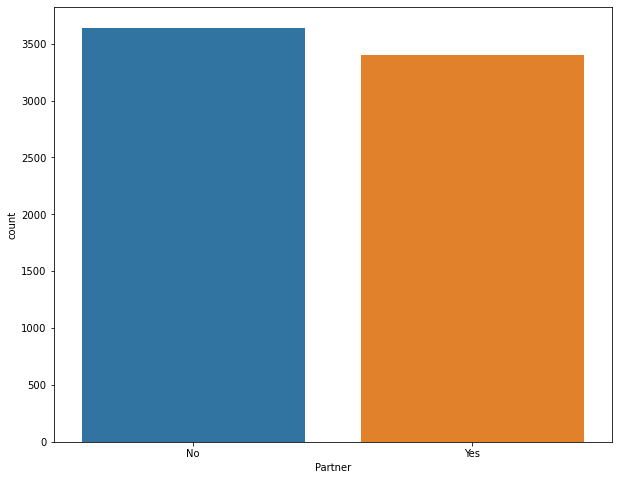

In [365]:
plt.figure(figsize=(10,8))
sns.countplot(df.Partner,order=df.Partner.value_counts().index)

In [366]:
countno = len(df[df.Partner == 'No'])
countyes = len(df[df.Partner ==  'Yes'])
print("Percentage of no: {:.2f}%".format((countno / (len(df.Partner))*100)))
print("Percentage of yes: {:.2f}%".format((countyes / (len(df.Partner))*100)))

Percentage of no: 51.70%
Percentage of yes: 48.30%


There is are balanced ratio between the partnered and indivudal connections customers.


In [367]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


__Dependents__

In [368]:
df.Dependents.value_counts()


No     4933
Yes    2110
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

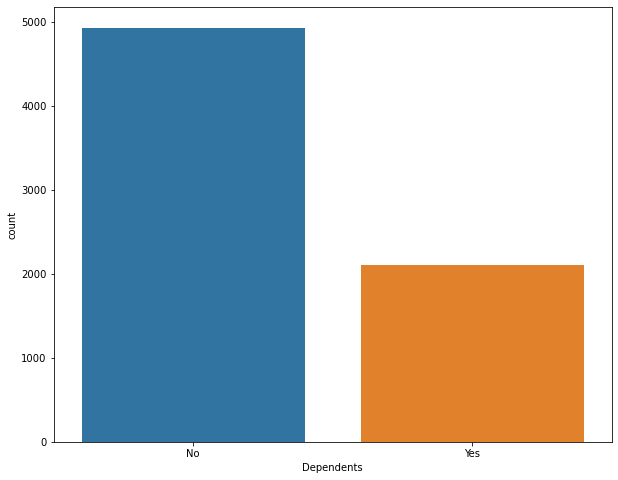

In [369]:
plt.figure(figsize=(10,8))
sns.countplot(df.Dependents,order=df.Dependents.value_counts().index)

In [370]:
countno = len(df[df.Dependents == 'No'])
countyes = len(df[df.Dependents ==  'Yes'])
print("Percentage of no: {:.2f}%".format((countno / (len(df.Dependents))*100)))
print("Percentage of yes: {:.2f}%".format((countyes / (len(df.Dependents))*100)))

Percentage of no: 70.04%
Percentage of yes: 29.96%


Most of the customers are independent. and almost 30 percent are dependent upon others

__tenure__


In [371]:
df.tenure.value_counts()


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<AxesSubplot:xlabel='tenure'>

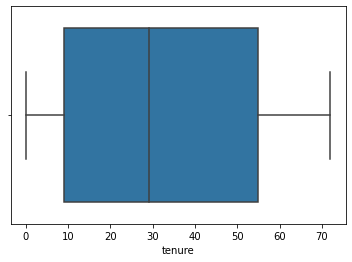

In [372]:
sns.boxplot(df.tenure)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

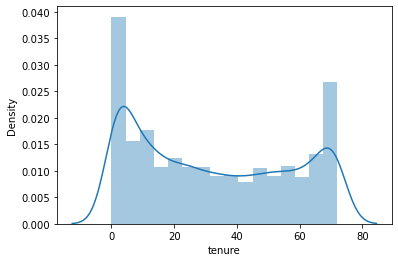

In [373]:
sns.distplot(df.tenure)



In [374]:
df.tenure.describe()


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

average of the tenure of customer is 32-35 

__phoneservice__

In [375]:
df.PhoneService.value_counts()


Yes    6361
No      682
Name: PhoneService, dtype: int64

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

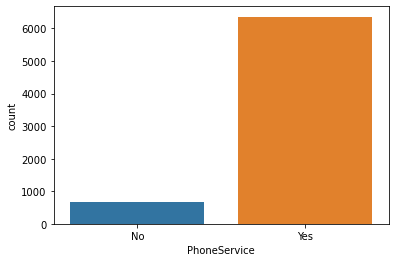

In [376]:
sns.countplot(df.PhoneService)


In [377]:
countno = len(df[df.PhoneService == 'No'])
countyes = len(df[df.PhoneService ==  'Yes'])
print("Percentage of no: {:.2f}%".format((countno / (len(df.PhoneService))*100)))
print("Percentage of yes: {:.2f}%".format((countyes / (len(df.PhoneService))*100)))

Percentage of no: 9.68%
Percentage of yes: 90.32%


maximum people almost 90 % have phone service and  10 percent doesnt

In [378]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [379]:
df.MultipleLines.value_counts()


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

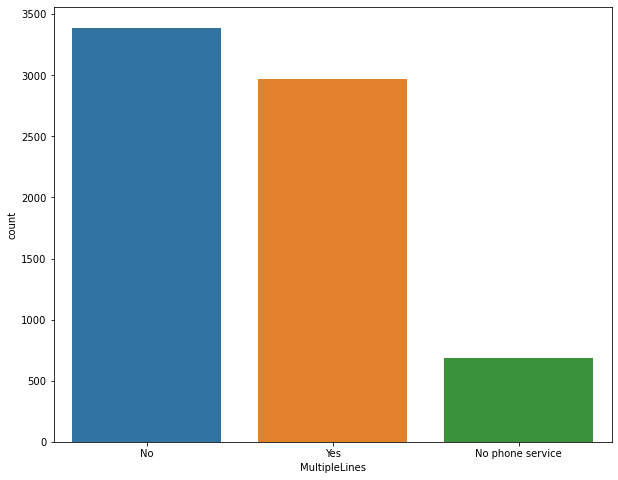

In [380]:
plt.figure(figsize=(10,8))
sns.countplot(df.MultipleLines,order=df.MultipleLines.value_counts().index)

In [381]:
countno = len(df[df.MultipleLines == 'No'])
countyes = len(df[df.MultipleLines ==  'Yes'])
print("Percentage of no: {:.2f}%".format((countno / (len(df.MultipleLines))*100)))
print("Percentage of yes: {:.2f}%".format((countyes / (len(df.MultipleLines))*100)))
countnoservice = len(df[df.MultipleLines ==  'No phone service'])
print("Percentage of noservice: {:.2f}%".format((countnoservice / (len(df.MultipleLines))*100)))

Percentage of no: 48.13%
Percentage of yes: 42.18%
Percentage of noservice: 9.68%


Customers equally use the multiline and single line phone services.


In [382]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


__internet servies__


In [383]:
df.InternetService.value_counts()


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

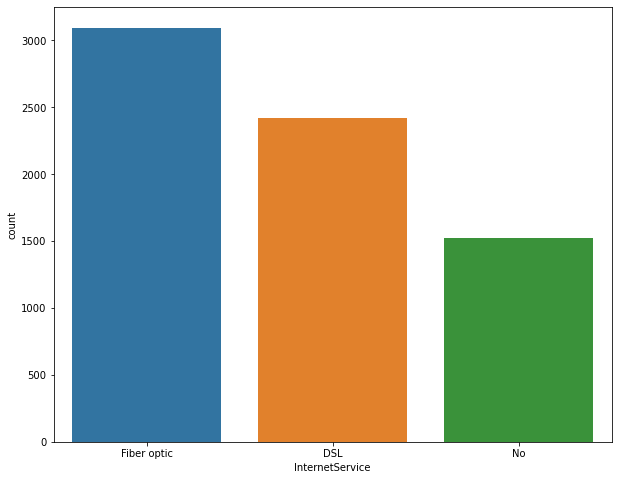

In [384]:
plt.figure(figsize=(10,8))
sns.countplot(df.InternetService,order=df.InternetService.value_counts().index)

In [385]:
countfibre = len(df[df.InternetService == 'Fibre optic'])
countDSL = len(df[df.InternetService ==  'DSL'])
print("Percentage of fibre: {:.2f}%".format((countno / (len(df.InternetService))*100)))
print("Percentage of DSl: {:.2f}%".format((countyes / (len(df.InternetService))*100)))
countno = len(df[df.InternetService ==  'No'])
print("Percentage of no: {:.2f}%".format((countno / (len(df.InternetService))*100)))

Percentage of fibre: 48.13%
Percentage of DSl: 42.18%
Percentage of no: 21.67%


Most of the customers have opted for Fibre Optic as it is the fasted and highest bandwidth connumication meduim.

Fibre optic being able to have a very high speed, the cost for the fibre optics is high, thus many of the custmers also prefer DSL i.e., Digital Subscriber Line.

Yet 21 percent of the customers prefer not have any internet connection.


In [386]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


__OnlineSecurity__

In [387]:
df.OnlineSecurity.value_counts()


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

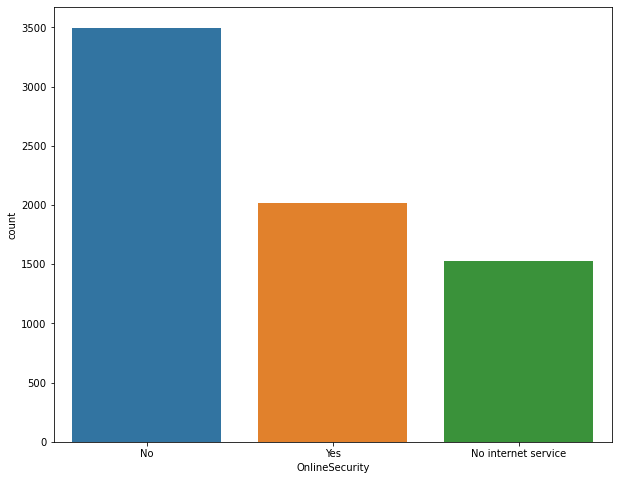

In [388]:
plt.figure(figsize=(10,8))
sns.countplot(df.OnlineSecurity,order=df.OnlineSecurity.value_counts().index)

In [389]:
countno = len(df[df.OnlineSecurity == 'No'])
countyes = len(df[df.OnlineSecurity ==  'Yes'])
print("Percentage of no: {:.2f}%".format((countno / (len(df.OnlineSecurity))*100)))
print("Percentage of yes: {:.2f}%".format((countyes / (len(df.OnlineSecurity))*100)))
countnoservice = len(df[df.OnlineSecurity ==  'No internet service'])
print("Percentage of noservice: {:.2f}%".format((countnoservice / (len(df.OnlineSecurity))*100)))

Percentage of no: 49.67%
Percentage of yes: 28.67%
Percentage of noservice: 21.67%


__OnlineBackup__      

In [390]:
df.OnlineBackup.value_counts()


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [391]:
countno = len(df[df.OnlineBackup == 'No'])
countyes = len(df[df.OnlineBackup ==  'Yes'])
print("Percentage of no: {:.2f}%".format((countno / (len(df.OnlineBackup))*100)))
print("Percentage of yes: {:.2f}%".format((countyes / (len(df.OnlineBackup))*100)))
countnoservice = len(df[df.OnlineBackup ==  'No internet service'])
print("Percentage of noservice: {:.2f}%".format((countnoservice / (len(df.OnlineBackup))*100)))

Percentage of no: 43.84%
Percentage of yes: 34.49%
Percentage of noservice: 21.67%


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

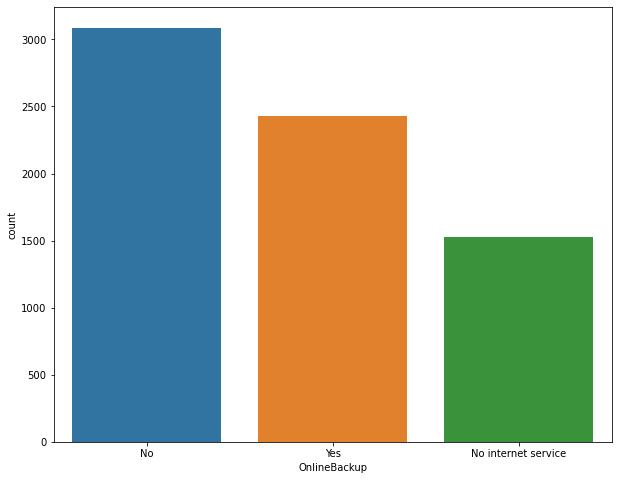

In [392]:
plt.figure(figsize=(10,8))
sns.countplot(df.OnlineBackup,order=df.OnlineBackup.value_counts().index)

__DeviceProtection__    

In [393]:
df.DeviceProtection.value_counts()


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [394]:
countno = len(df[df.DeviceProtection == 'No'])
countyes = len(df[df.DeviceProtection ==  'Yes'])
print("Percentage of no: {:.2f}%".format((countno / (len(df.DeviceProtection))*100)))
print("Percentage of yes: {:.2f}%".format((countyes / (len(df.DeviceProtection))*100)))
countnoservice = len(df[df.DeviceProtection ==  'No internet service'])
print("Percentage of noservice: {:.2f}%".format((countnoservice / (len(df.DeviceProtection))*100)))

Percentage of no: 43.94%
Percentage of yes: 34.39%
Percentage of noservice: 21.67%


<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

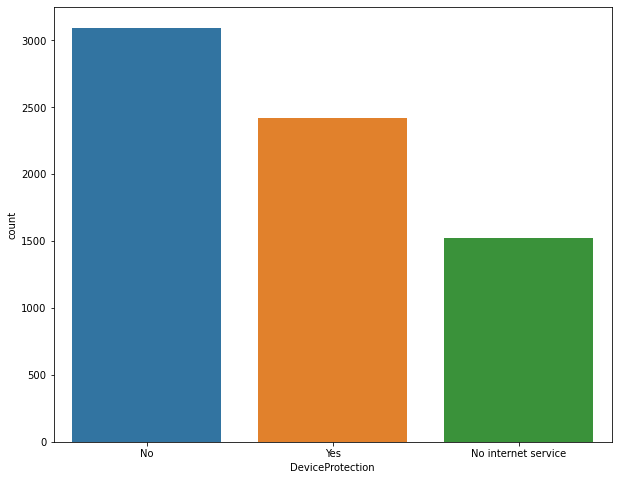

In [395]:
plt.figure(figsize=(10,8))
sns.countplot(df.DeviceProtection,order=df.DeviceProtection.value_counts().index)

__TechSupport__

In [396]:
df.TechSupport.value_counts()


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

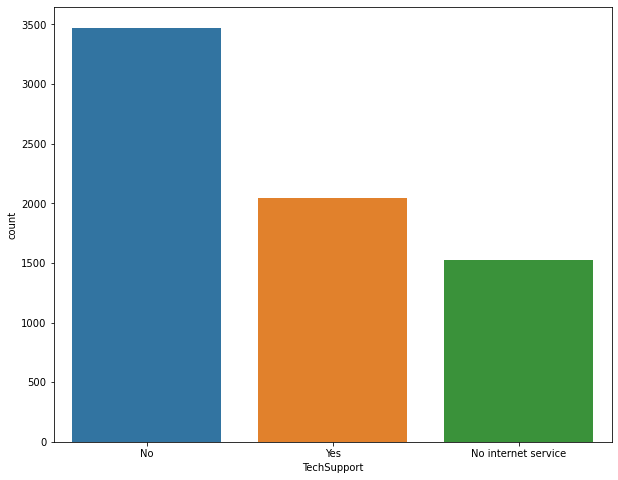

In [397]:
plt.figure(figsize=(10,8))
sns.countplot(df.TechSupport,order=df.TechSupport.value_counts().index)

In [398]:
countno = len(df[df.TechSupport == 'No'])
countyes = len(df[df.TechSupport ==  'Yes'])
print("Percentage of no: {:.2f}%".format((countno / (len(df.TechSupport))*100)))
print("Percentage of yes: {:.2f}%".format((countyes / (len(df.TechSupport))*100)))
countnoservice = len(df[df.TechSupport ==  'No internet service'])
print("Percentage of noservice: {:.2f}%".format((countnoservice / (len(df.TechSupport))*100)))

Percentage of no: 49.31%
Percentage of yes: 29.02%
Percentage of noservice: 21.67%


__StreamingTV__ 

In [399]:
df.StreamingTV.value_counts()


No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

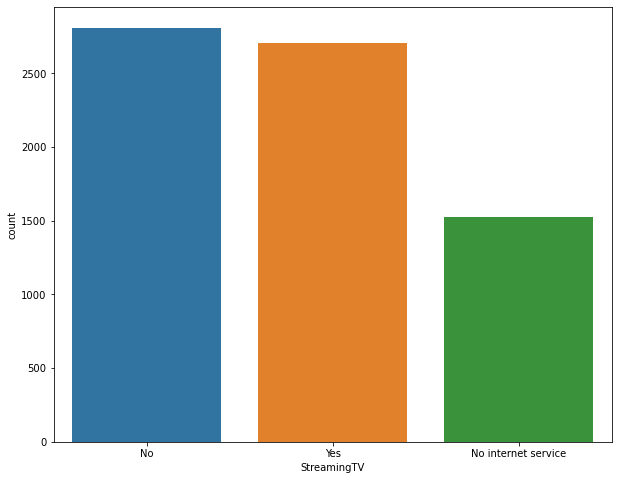

In [400]:
plt.figure(figsize=(10,8))
sns.countplot(df.StreamingTV,order=df.StreamingTV.value_counts().index)

In [401]:
countno = len(df[df.StreamingTV == 'No'])
countyes = len(df[df.StreamingTV ==  'Yes'])
print("Percentage of no: {:.2f}%".format((countno / (len(df.StreamingTV))*100)))
print("Percentage of yes: {:.2f}%".format((countyes / (len(df.StreamingTV))*100)))
countnoservice = len(df[df.StreamingTV ==  'No internet service'])
print("Percentage of noservice: {:.2f}%".format((countnoservice / (len(df.StreamingTV))*100)))

Percentage of no: 39.90%
Percentage of yes: 38.44%
Percentage of noservice: 21.67%


__Streamingmovies__

In [402]:
df.StreamingMovies.value_counts()


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [403]:
countno = len(df[df.StreamingMovies == 'No'])
countyes = len(df[df.StreamingMovies ==  'Yes'])
print("Percentage of no: {:.2f}%".format((countno / (len(df.StreamingMovies))*100)))
print("Percentage of yes: {:.2f}%".format((countyes / (len(df.StreamingMovies))*100)))
countnoservice = len(df[df.StreamingMovies ==  'No internet service'])
print("Percentage of noservice: {:.2f}%".format((countnoservice / (len(df.StreamingMovies))*100)))

Percentage of no: 39.54%
Percentage of yes: 38.79%
Percentage of noservice: 21.67%


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

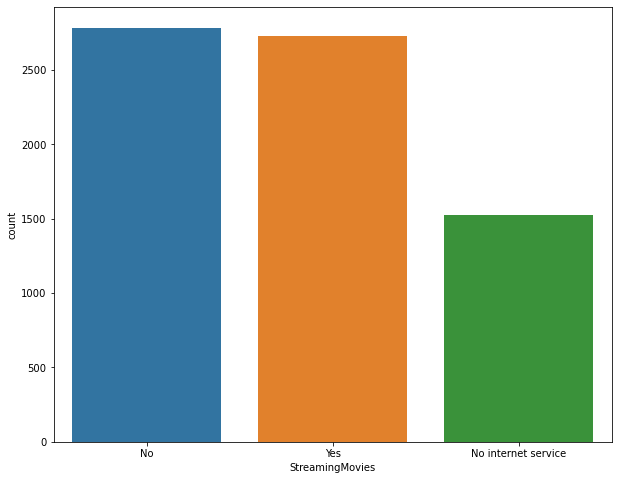

In [404]:
plt.figure(figsize=(10,8))
sns.countplot(df.StreamingMovies,order=df.StreamingMovies.value_counts().index)

# 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'


There above are the services on can avail only if they had availed the internet service.


__contract__

In [405]:
df.Contract.value_counts()


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='count'>

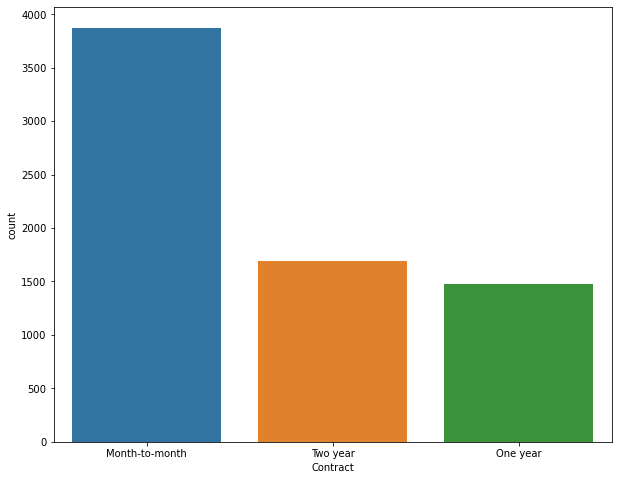

In [406]:
plt.figure(figsize=(10,8))
sns.countplot(df.Contract,order=df.Contract.value_counts().index)

#  Customer mostly prefer the month to month contract.


__payments mathod__

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

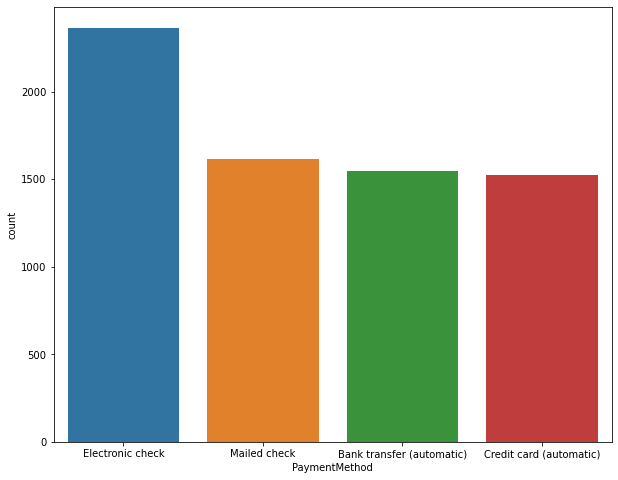

In [407]:
plt.figure(figsize=(10,8))
sns.countplot(df.PaymentMethod,order=df.PaymentMethod.value_counts().index)

__Electronic Check is preferreed mostly by the customers.__


In [408]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


__PaperlessBilling__

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

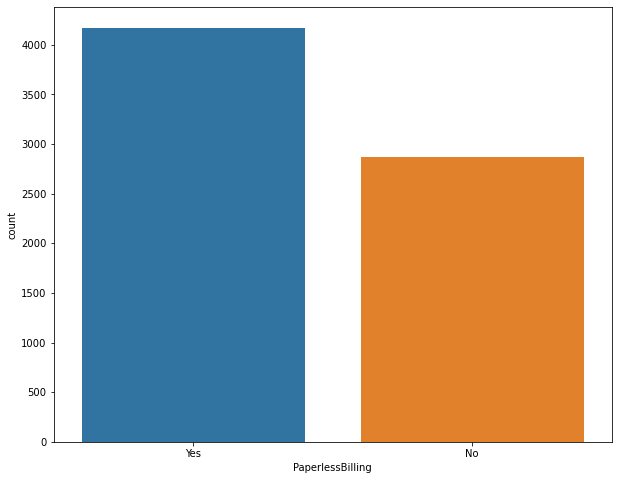

In [409]:
plt.figure(figsize=(10,8))
sns.countplot(df.PaperlessBilling,order=df.PaperlessBilling.value_counts().index)

__mostly billing were paperless__

# monthly charges and total charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

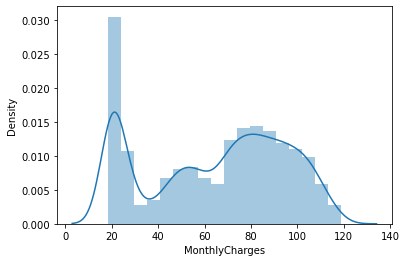

In [410]:
sns.distplot(df.MonthlyCharges) 


<AxesSubplot:xlabel='MonthlyCharges'>

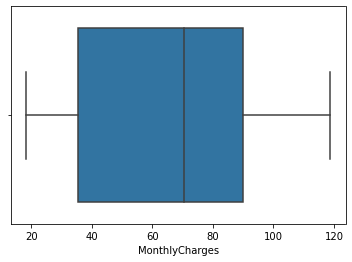

In [411]:
sns.boxplot(df.MonthlyCharges)

In [412]:
df.TotalCharges


0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [413]:
len(df[df.TotalCharges == ' '])


11

In [414]:
df[df.TotalCharges == ' ']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [415]:
df.TotalCharges.replace(' ',np.nan,inplace=True)


In [416]:
df.TotalCharges = df.TotalCharges.astype('float')


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

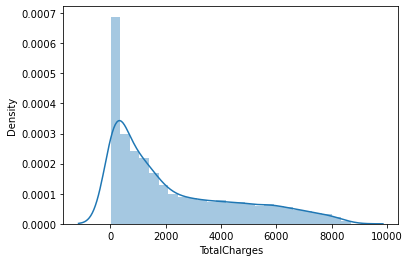

In [417]:
sns.distplot(df.TotalCharges)


In [418]:
df.dropna(subset=['TotalCharges'],inplace=True)


In [419]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [420]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# target ('churn')

In [421]:
df.Churn.value_counts()


No     5163
Yes    1869
Name: Churn, dtype: int64

In [422]:
countno = len(df[df.Churn == 'No'])
countyes = len(df[df.Churn ==  'Yes'])
print("Percentage of no: {:.2f}%".format((countno / (len(df.Churn))*100)))
print("Percentage of yes: {:.2f}%".format((countyes / (len(df.Churn))*100)))

Percentage of no: 73.42%
Percentage of yes: 26.58%


<AxesSubplot:xlabel='Churn', ylabel='count'>

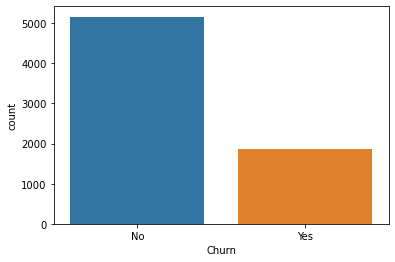

In [423]:
sns.countplot(df.Churn)


# So we have the target classes in the 25 to 75 ratio.



# Multivariate anaysis.


In [424]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [425]:
#lets get rid of redundant columns

df.drop('customerID',1,inplace=True)


In [426]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


__gender/seniorcitizen vs churn__

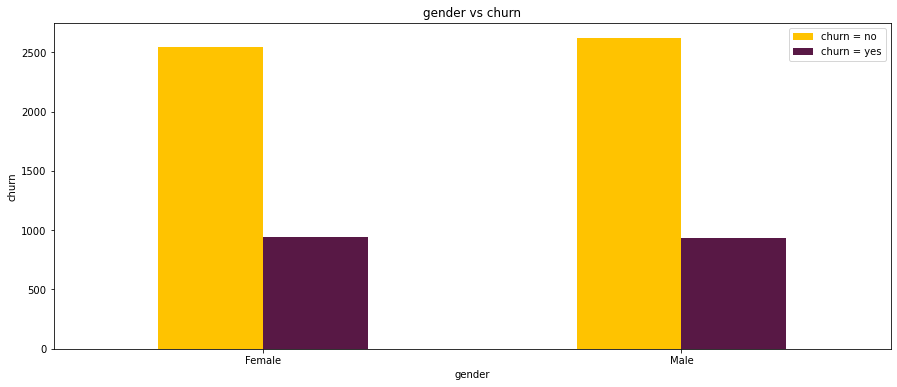

In [427]:
pd.crosstab(df.gender,df.Churn).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('gender vs churn')
plt.xlabel('gender')
plt.xticks(rotation = 0)
plt.legend(["churn = no", "churn = yes"])
plt.ylabel('churn')
plt.show()

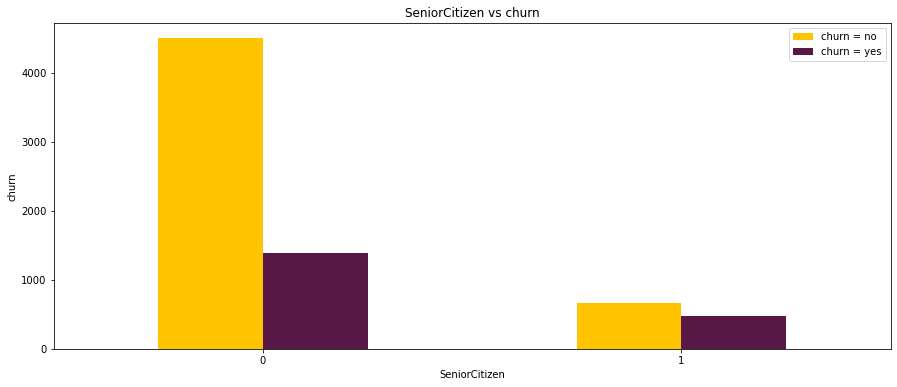

In [428]:
pd.crosstab(df.SeniorCitizen,df.Churn).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('SeniorCitizen vs churn')
plt.xlabel('SeniorCitizen')
plt.xticks(rotation = 0)
plt.legend(["churn = no", "churn = yes"])
plt.ylabel('churn')
plt.show()

__tenure vs churn__

<AxesSubplot:xlabel='tenure', ylabel='Density'>

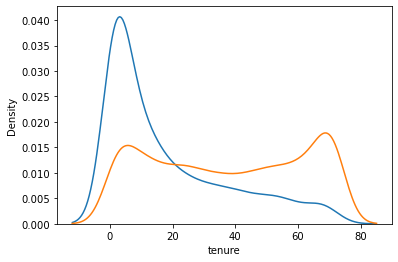

In [429]:
sns.kdeplot(df[df.Churn == 'Yes']['tenure'],label='Yes')
sns.kdeplot(df[df.Churn != 'Yes']['tenure'],label='No')

The customers with less tenures mostly stop the services.

The regular cust0mers are distributed uniformly,have normal distribution

__internet service vs the monthly price__


<AxesSubplot:xlabel='InternetService', ylabel='MonthlyCharges'>

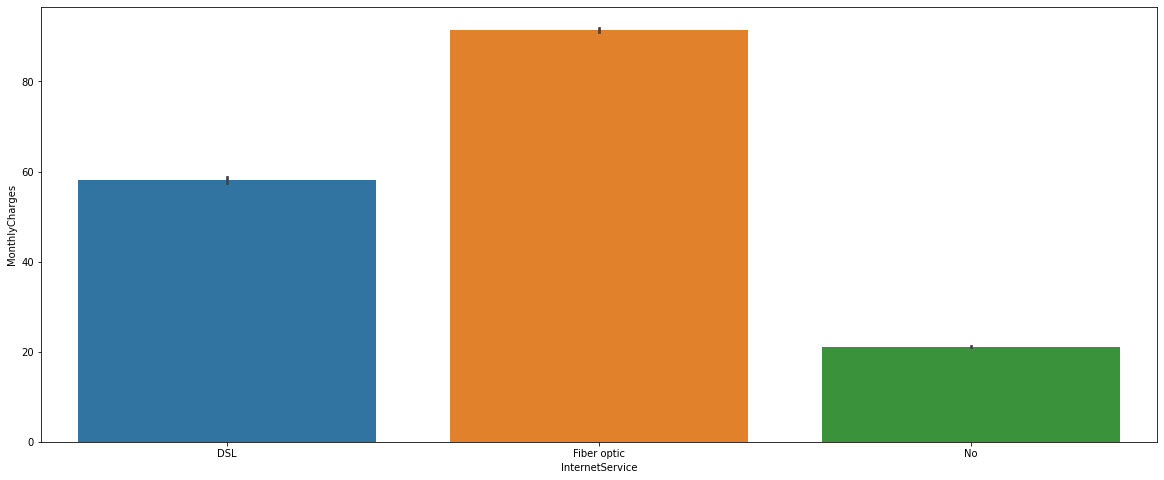

In [430]:
plt.figure(figsize=(20,8))
sns.barplot(df.InternetService,df.MonthlyCharges)

well, montly wise Fibre poptics are costly than DSL


__multiple lines vs monthly bills__


<AxesSubplot:xlabel='MultipleLines', ylabel='MonthlyCharges'>

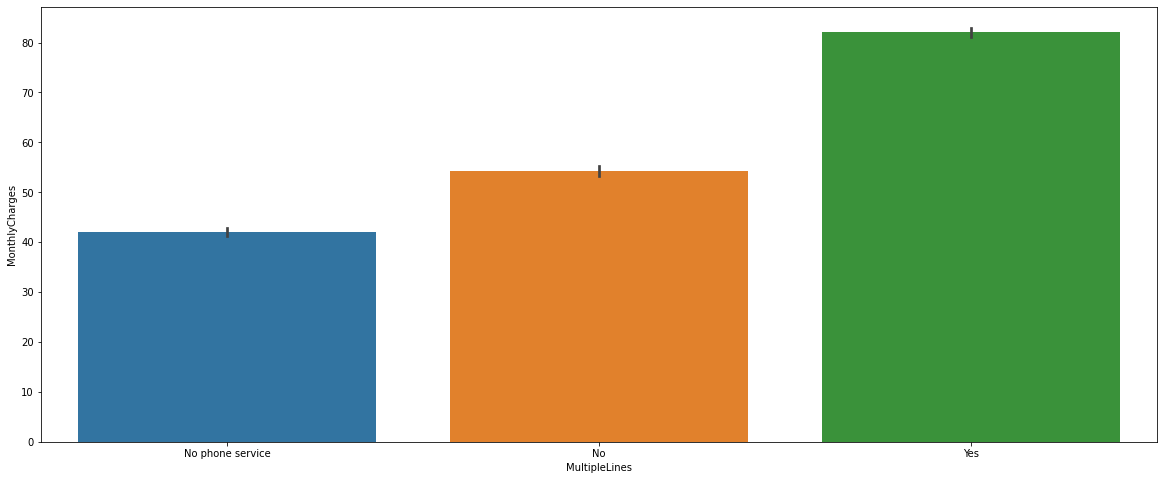

In [431]:
plt.figure(figsize=(20,8))
sns.barplot(df.MultipleLines,df.MonthlyCharges)

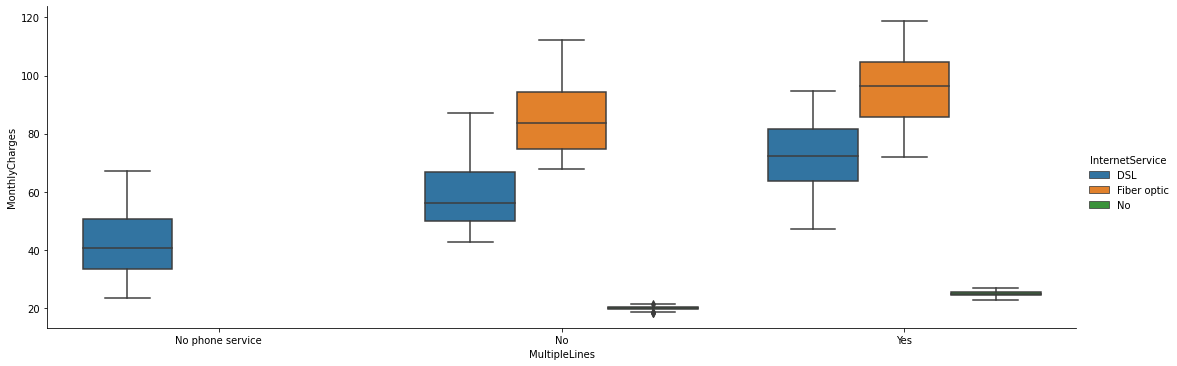

In [432]:
sns.catplot(x='MultipleLines',y='MonthlyCharges',data=df,kind='box',hue='InternetService',aspect=3)

yes,multiples lines make monthly charge costly

__payment method vs tenure__


<AxesSubplot:xlabel='PaymentMethod', ylabel='tenure'>

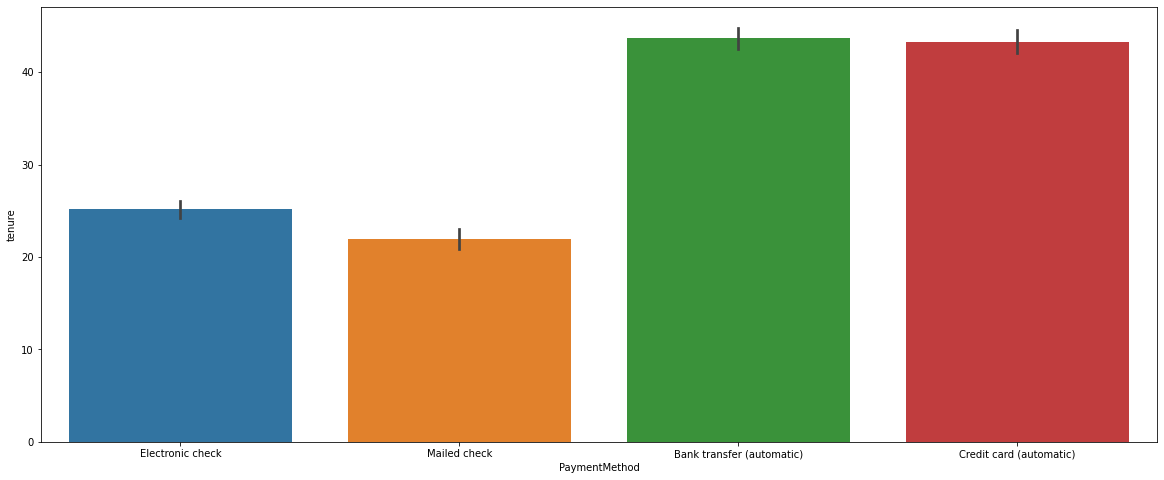

In [433]:
plt.figure(figsize=(20,8))
sns.barplot(df.PaymentMethod,df.tenure)

having high tenure , customers do prefer automatic payments more

__Total charges vs chruns__


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

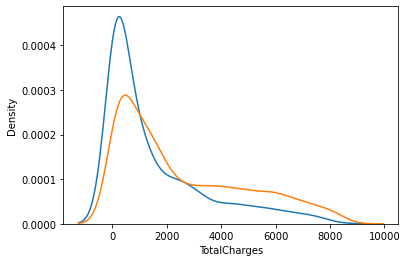

In [434]:
sns.kdeplot(df[df.Churn == 'Yes']['TotalCharges'],label='Yes')
sns.kdeplot(df[df.Churn != 'Yes']['TotalCharges'],label='No')

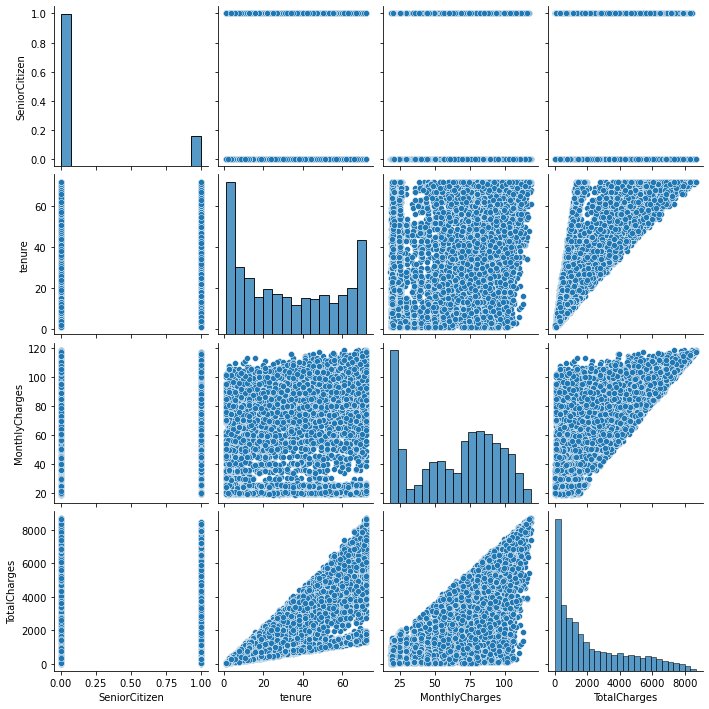

In [435]:
sns.pairplot(df)


total charges/montly charges are almost vice versa and uniformly distributed to other features

__the internet services__


In [436]:
df.InternetService.value_counts()


Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [437]:
df[df.InternetService == 'No']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
16,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,Female,0,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,Female,0,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,No
7020,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,No
7030,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No


In [438]:
sub_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','MonthlyCharges']


In [439]:
df_sub_services = df[df.InternetService != 'No'][sub_services]


In [440]:
df_sub_services.head()


,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges
0,No,Yes,No,No,No,No,29.85
1,Yes,No,Yes,No,No,No,56.95
2,Yes,Yes,No,No,No,No,53.85
3,Yes,No,Yes,Yes,No,No,42.30
4,No,No,No,No,No,No,70.70


In [441]:
df_sub_services = df_sub_services.replace({'Yes':1,'No':0})


In [442]:
df_sub_services


,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges
0,0,1,0,0,0,0,29.85
1,1,0,1,0,0,0,56.95
2,1,1,0,0,0,0,53.85
3,1,0,1,1,0,0,42.30
4,0,0,0,0,0,0,70.70
...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,84.80
7039,0,1,1,0,1,1,103.20
7040,1,0,0,0,0,0,29.60
7041,0,0,0,0,0,0,74.40


In [443]:
df_sub_services['AverageServices'] = df_sub_services.iloc[:,:-1].sum(axis=1)


In [444]:
df_sub_services


,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,AverageServices
0,0,1,0,0,0,0,29.85,1
1,1,0,1,0,0,0,56.95,2
2,1,1,0,0,0,0,53.85,2
3,1,0,1,1,0,0,42.30,3
4,0,0,0,0,0,0,70.70,0
...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,84.80,5
7039,0,1,1,0,1,1,103.20,4
7040,1,0,0,0,0,0,29.60,1
7041,0,0,0,0,0,0,74.40,0


__average service vs monthly charges__


In [445]:
df_sub_services.corr()['MonthlyCharges']


OnlineSecurity      0.069771
OnlineBackup        0.252683
DeviceProtection    0.322484
TechSupport         0.135067
StreamingTV         0.533069
StreamingMovies     0.525303
MonthlyCharges      1.000000
AverageServices     0.537205
Name: MonthlyCharges, dtype: float64

<AxesSubplot:xlabel='AverageServices', ylabel='MonthlyCharges'>

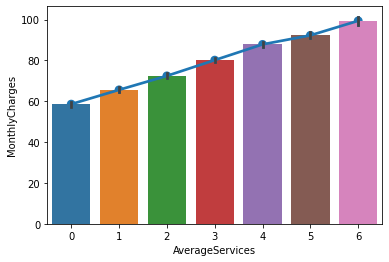

In [446]:
sns.pointplot(df_sub_services.AverageServices,df_sub_services.MonthlyCharges)
sns.barplot(df_sub_services.AverageServices,df_sub_services.MonthlyCharges)

__The monthly charges increase as the number of subproducts increase__


In [447]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [448]:
df.shape

(7032, 20)

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


__removing outliers and replacing yes,no in columns__

In [450]:
df.SeniorCitizen = df.SeniorCitizen.astype(object)


In [451]:
df.SeniorCitizen.dtype


dtype('O')

In [452]:
df.SeniorCitizen.replace({0:'No',1:'Yes'},inplace=True)

In [453]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [454]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


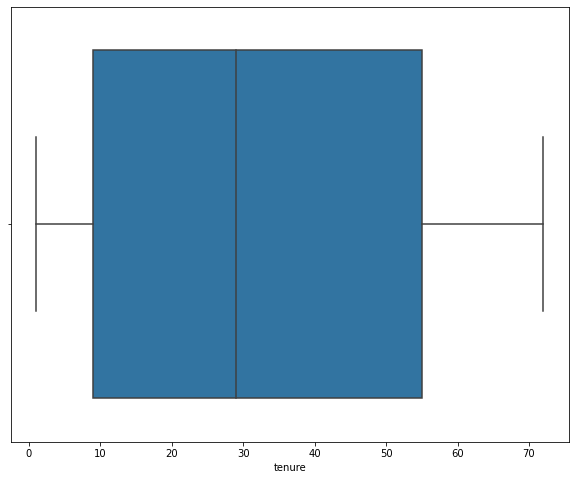

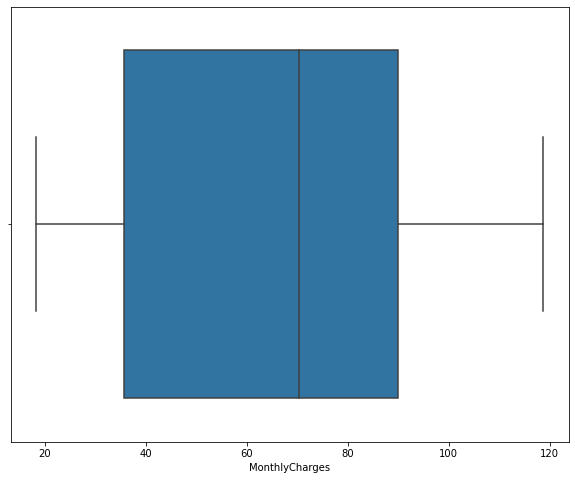

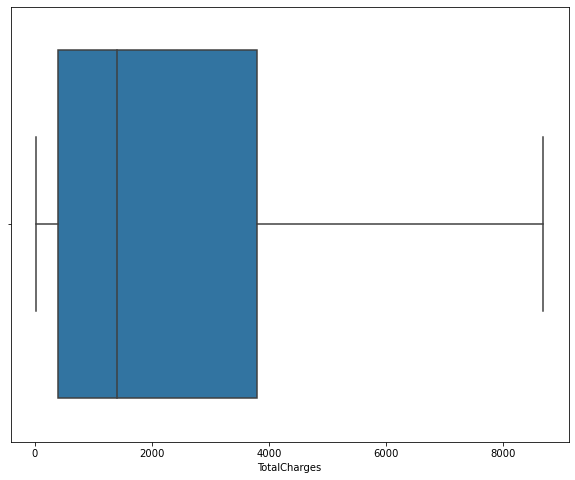

In [455]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.figure(figsize=(10,8))
    sns.boxplot(df[col])

# there are no outliers here 

In [456]:
# skew stats


In [457]:
df.skew()


tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

In [458]:
num_var = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [459]:
# try1 : log transforation
np.log1p(df[num_var]).skew()

tenure           -0.774128
MonthlyCharges   -0.720968
TotalCharges     -0.743089
dtype: float64

In [460]:
# try2 : Sqrt transforation
np.sqrt(df[num_var]).skew()

tenure           -0.234197
MonthlyCharges   -0.486283
TotalCharges      0.308926
dtype: float64

In [461]:
# try3 : Cbrt transformation
np.cbrt(df[num_var]).skew()

tenure           -0.446701
MonthlyCharges   -0.570884
TotalCharges      0.012819
dtype: float64

__The square root transformation works better when the features has poisitive skew,thus it works well here too..__


In [462]:
df[num_var] = np.sqrt(df[num_var])


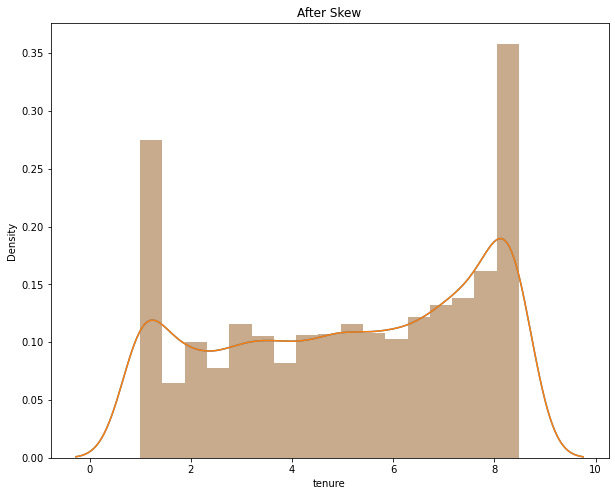

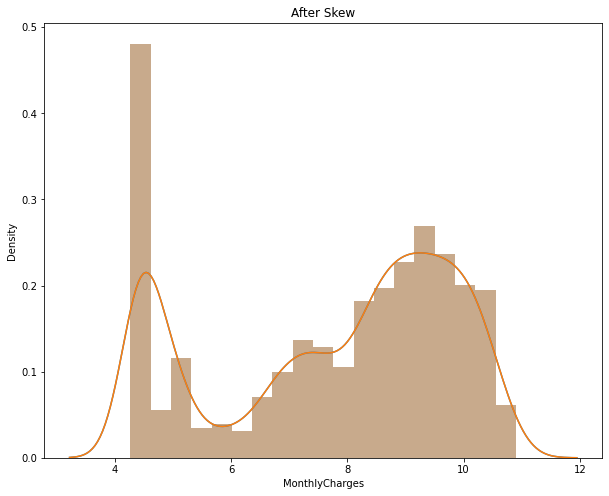

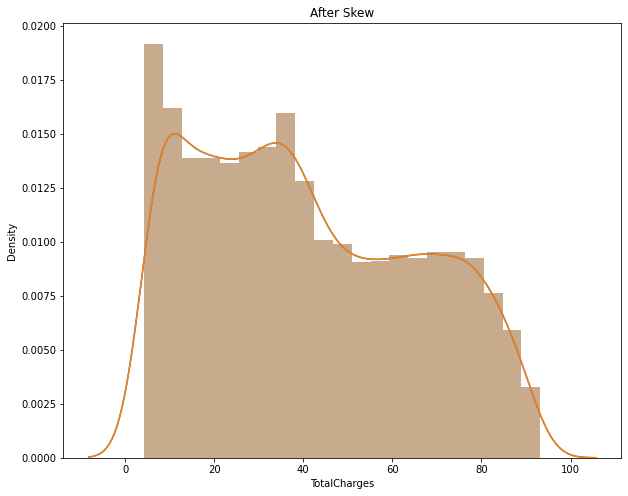

In [463]:
for col in num_var:
    plt.figure(figsize=(10,8))
    
    sns.distplot(df[col])
    plt.title('Before Skew')
    sns.distplot(df[col])
    plt.title('After Skew')

# encoding data set

In [464]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,5.463515,5.463515,No
1,Male,No,No,No,5.830952,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,7.546522,43.468379,No
2,Male,No,No,No,1.414214,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,7.338256,10.399519,Yes
3,Male,No,No,No,6.708204,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),6.503845,42.903963,No
4,Female,No,No,No,1.414214,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,8.408329,12.314625,Yes


In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   float64
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [466]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
  
df['Churn']= le.fit_transform(df['Churn'])

In [467]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,5.463515,5.463515,0
1,Male,No,No,No,5.830952,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,7.546522,43.468379,0
2,Male,No,No,No,1.414214,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,7.338256,10.399519,1
3,Male,No,No,No,6.708204,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),6.503845,42.903963,0
4,Female,No,No,No,1.414214,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,8.408329,12.314625,1


In [468]:
df=pd.get_dummies(df,columns=df.columns[df.dtypes=="object"],drop_first=True)


In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   float64
 1   MonthlyCharges                         7032 non-null   float64
 2   TotalCharges                           7032 non-null   float64
 3   Churn                                  7032 non-null   int32  
 4   gender_Male                            7032 non-null   uint8  
 5   SeniorCitizen_Yes                      7032 non-null   uint8  
 6   Partner_Yes                            7032 non-null   uint8  
 7   Dependents_Yes                         7032 non-null   uint8  
 8   PhoneService_Yes                       7032 non-null   uint8  
 9   MultipleLines_No phone service         7032 non-null   uint8  
 10  MultipleLines_Yes                      7032 non-null   uint8  
 11  Inte

In [470]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.000000,5.463515,5.463515,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,5.830952,7.546522,43.468379,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,1.414214,7.338256,10.399519,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,6.708204,6.503845,42.903963,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1.414214,8.408329,12.314625,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


# X and y split


In [471]:
X = df.drop('Churn',axis = 1)
y = df['Churn']

In [472]:
X.shape,y.shape


((7032, 30), (7032,))

# Train and Test Splits


In [473]:
from sklearn.model_selection import train_test_split


In [474]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [475]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape


((4922, 30), (4922,), (2110, 30), (2110,))

In [476]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

#  Building the model


In [477]:

# importing the training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [478]:
# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [479]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7336492890995261
[[1253  296]
 [ 266  295]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1549
           1       0.50      0.53      0.51       561

    accuracy                           0.73      2110
   macro avg       0.66      0.67      0.66      2110
weighted avg       0.74      0.73      0.74      2110



In [480]:
lrg=LogisticRegression()
lrg.fit(X_train,y_train)
lrg.score(X_train,y_train)
predlrg=lrg.predict(X_test)
print(accuracy_score(y_test,predlrg))
print(confusion_matrix(y_test,predlrg))
print(classification_report(y_test,predlrg))

0.7971563981042654
[[1390  159]
 [ 269  292]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [481]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
predknn=knn.predict(X_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7644549763033175
[[1313  236]
 [ 261  300]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1549
           1       0.56      0.53      0.55       561

    accuracy                           0.76      2110
   macro avg       0.70      0.69      0.69      2110
weighted avg       0.76      0.76      0.76      2110



In [482]:
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
svc.score(X_train,y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7341232227488151
[[1549    0]
 [ 561    0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



In [483]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(X_train,y_train)
    svc.score(X_train,y_train)
    predsvc=svc.predict(X_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [484]:
svmkernel('rbf')

0.7824644549763033
[[1442  107]
 [ 352  209]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1549
           1       0.66      0.37      0.48       561

    accuracy                           0.78      2110
   macro avg       0.73      0.65      0.67      2110
weighted avg       0.77      0.78      0.76      2110



In [485]:
# Predicted values
y_head_lrg = lrg.predict(X_test)
knn3 = KNeighborsClassifier(n_neighbors = 5)
knn3.fit(X_train, y_train)
y_head_knn = knn3.predict(X_test)
y_head_svc = svc.predict(X_test)
y_head_dtc = dtc.predict(X_test)

In [486]:
from sklearn.metrics import confusion_matrix

cm_lrg = confusion_matrix(y_test,y_head_lrg)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svc = confusion_matrix(y_test,y_head_svc)
cm_dtc = confusion_matrix(y_test,y_head_dtc)

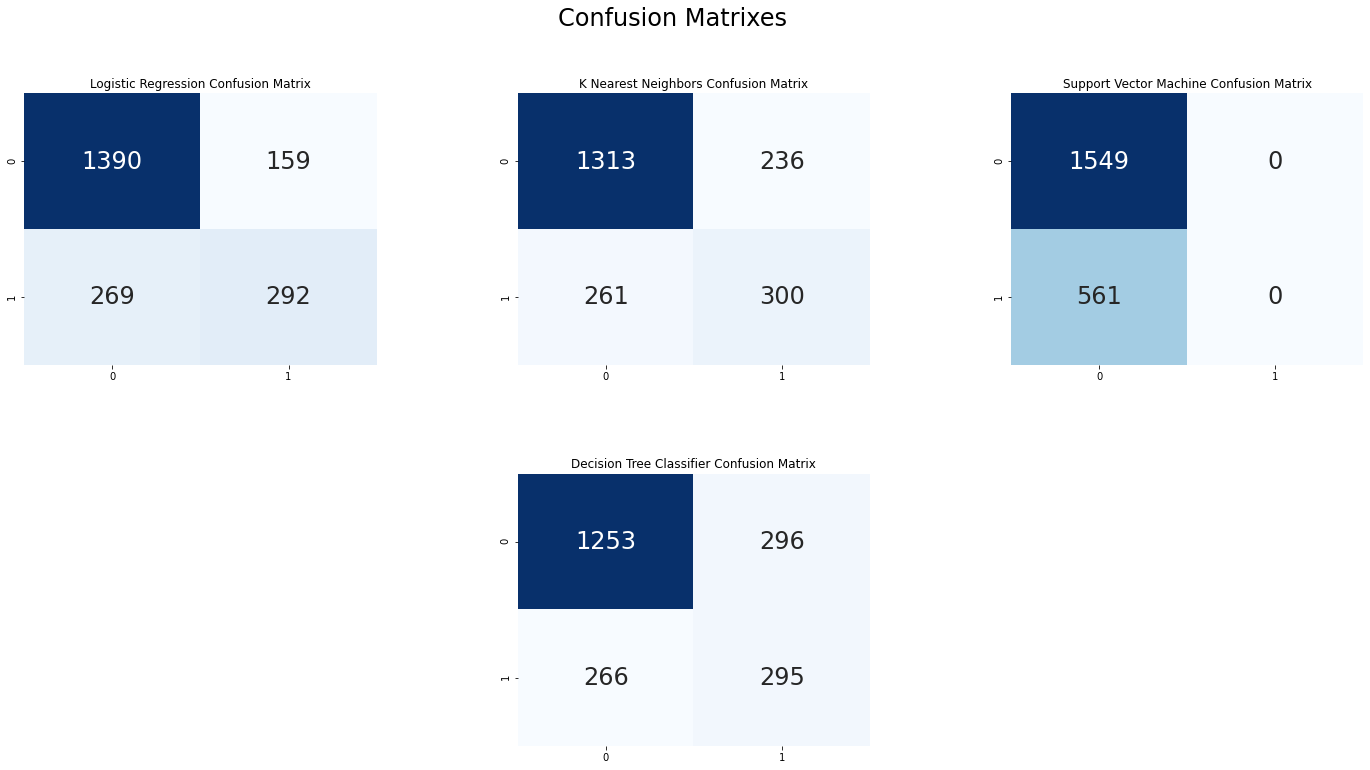

In [487]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lrg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [488]:
# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [489]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [490]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=45)
GNB=GaussianNB()
RFC=RandomForestClassifier(random_state=45)
GBC=GradientBoostingClassifier(random_state=45)
ABC=AdaBoostClassifier(random_state=45)
ETC=ExtraTreesClassifier(random_state=45)

In [491]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

---------------------> KNeighborsClassifier <----------------------


KNeighborsClassifier()


Accuracy_score =  0.7644549763033175


Cross_Val_Score =  0.7677746750937541


roc_auc_score =  0.6912014996737588


classification_report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1549
           1       0.56      0.53      0.55       561

    accuracy                           0.76      2110
   macro avg       0.70      0.69      0.69      2110
weighted avg       0.76      0.76      0.76      2110



[[1313  236]
 [ 261  300]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



---------------------> SVC <----------------------


SVC()


Accuracy_score =  0.7824644549763033


Cross_Val_Score =  0.8000567777705936


roc_auc_score =  0.6517360979252902


classification_report
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      1549
           1       0.66      0.37      0.48       5

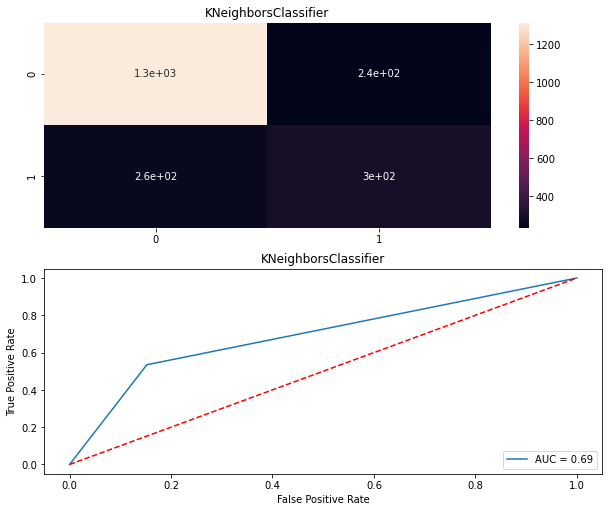

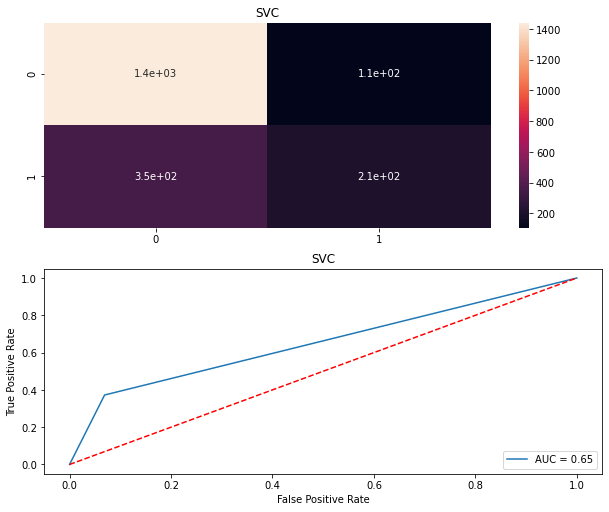

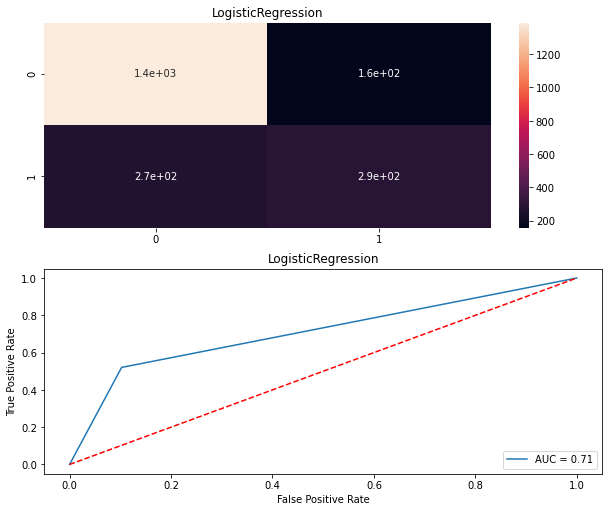

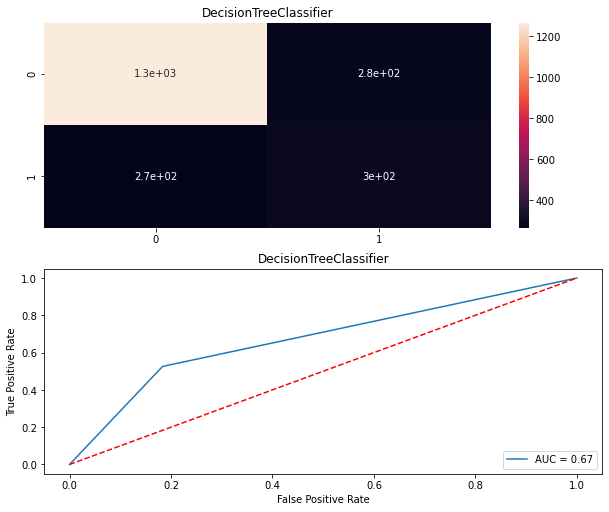

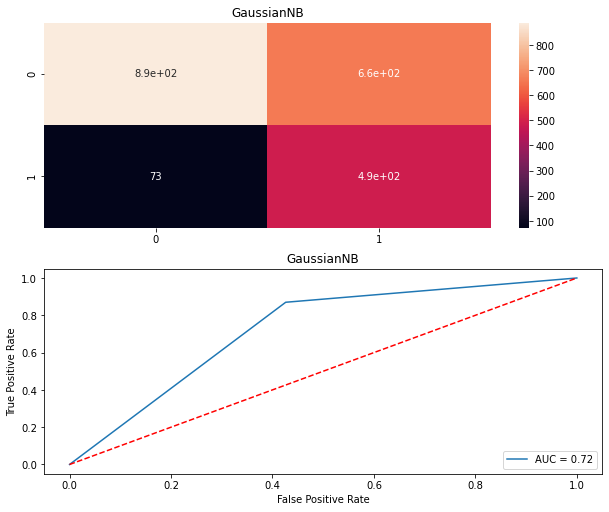

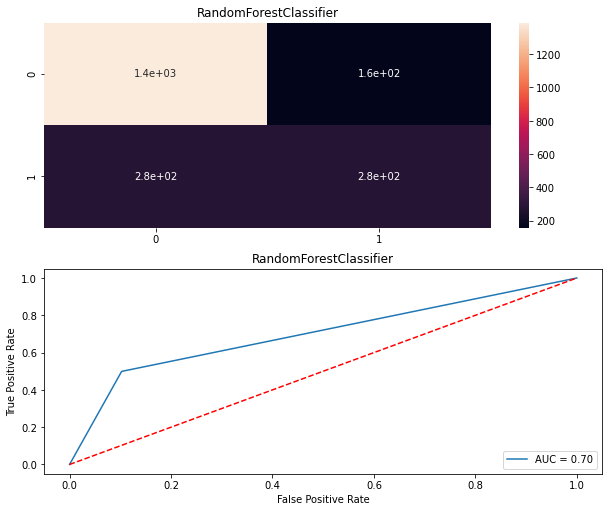

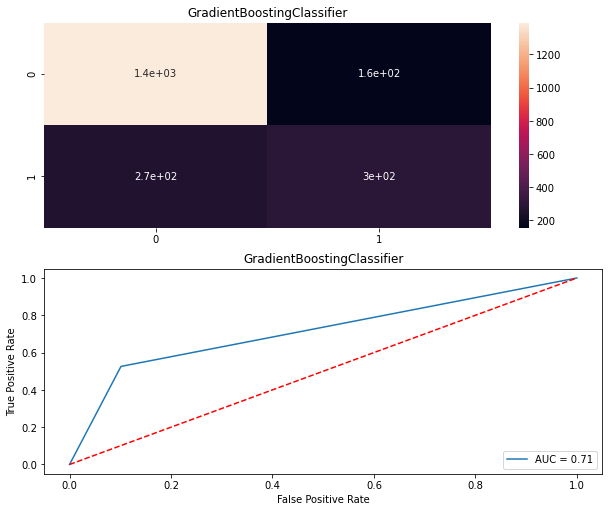

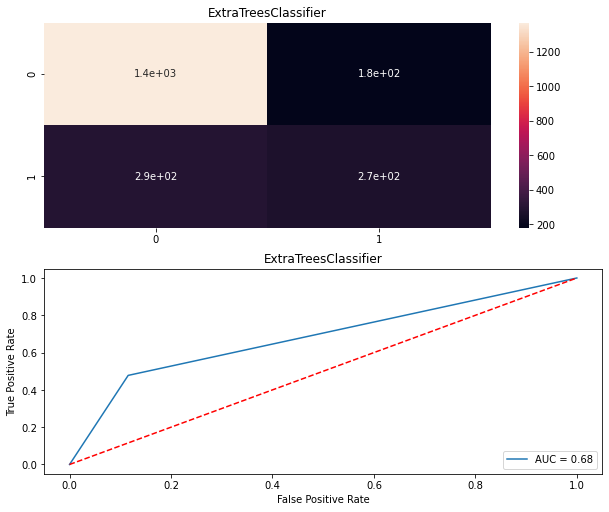

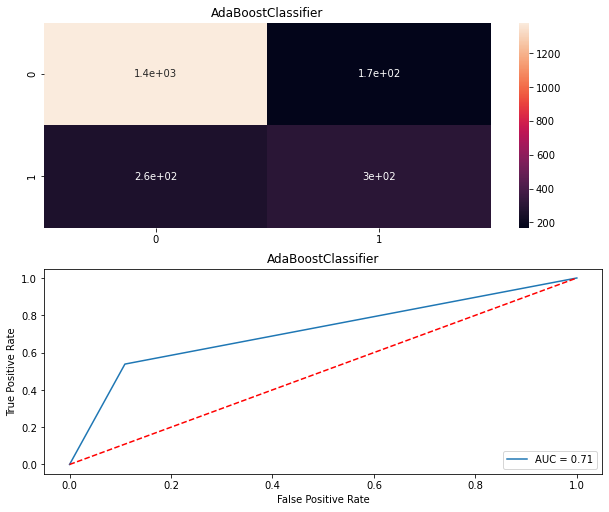

In [492]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('--------------------->',name,'<----------------------')
    print('\n')
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre=model.predict(X_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS)
    print('\n')
    sc = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [493]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,0.764455,0.767775,0.691201
1,SVC,0.782464,0.800057,0.651736
2,LogisticRegression,0.797156,0.808163,0.708926
3,DecisionTreeClassifier,0.739336,0.727246,0.671251
4,GaussianNB,0.652607,0.662681,0.721897
5,RandomForestClassifier,0.791469,0.791665,0.698231
6,GradientBoostingClassifier,0.799526,0.806171,0.712245
7,ExtraTreesClassifier,0.776303,0.781707,0.681080
8,AdaBoostClassifier,0.797156,0.805031,0.714611


* After training n number of models, we can finally conclude that the decision tree is working th best in this case.

In [494]:
models = [LogisticRegression(),SVC(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=150),AdaBoostClassifier(RandomForestClassifier())]
model_names = 'Logistic_reg SVC KNN Random_forest Decision_Treee Gradient_boost Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Random_forest
Decision_Treee
Gradient_boost
Adaboost


In [495]:
models_df

,Algo,Train_acc,Test_acc,Precision,Recall,F1_score,Avg_CV
0,Logistic_reg,0.811662,0.797156,0.797156,0.797156,0.797156,0.807600
1,SVC,0.790939,0.782464,0.782464,0.782464,0.782464,0.787083
2,KNN,0.844372,0.764455,0.764455,0.764455,0.764455,0.776516
3,Random_forest,0.998578,0.725118,0.725118,0.725118,0.725118,0.725926
4,Decision_Treee,0.998578,0.787678,0.787678,0.787678,0.787678,0.791753
5,Gradient_boost,0.839090,0.796209,0.796209,0.796209,0.796209,0.800287
6,Adaboost,0.998578,0.782938,0.782938,0.782938,0.782938,0.795613


# Here We have Logistic Regression as the winner beating Gradient Boost with a margin of 0.005%.


In [496]:
best_model = LogisticRegression()


In [497]:
best_model.fit(X_train,y_train)

LogisticRegression()

In [498]:
y_preds = best_model.predict(X_test)


In [499]:
best_model.score(X_test,y_test)

0.7971563981042654

In [500]:
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    print('Train_Acc:', model.score(X_train,y_train))
    print('Test_Acc:', model.score(X_test,y_test))
    print('Recall:', recall_score(y_test,model.predict(X_test),average='micro'))
    print('Precision:',recall_score(y_test,model.predict(X_test),average='micro'))
    print('F1:',recall_score(y_test,model.predict(X_test),average='micro'))

In [501]:
train_n_ret_scores(LogisticRegression())


Train_Acc: 0.8116619260463226
Test_Acc: 0.7971563981042654
Recall: 0.7971563981042654
Precision: 0.7971563981042654
F1: 0.7971563981042654


In [502]:
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



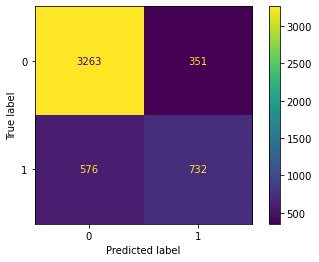

In [503]:
plot_confusion_matrix(best_model,X_train,y_train)


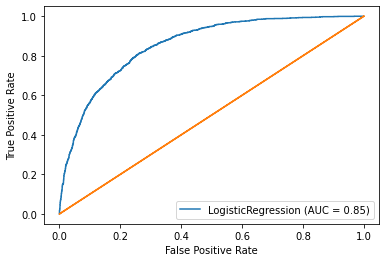

In [504]:
plot_roc_curve(best_model,X_train,y_train)
plt.plot(y_train,y_train)

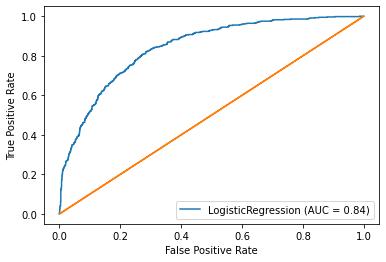

In [505]:
plot_roc_curve(best_model,X_test,y_test)
plt.plot(y_test,y_test)

# saving the best model

In [506]:
import joblib 
joblib.dump(best_model,'loan_prediction.pkl')

['loan_prediction.pkl']

# summary

in above model it is summaried that relation analysis between features and target with best visualisation

also best model has been predicted which is logistic regression with best f1 and roc score
